## Introduction
Because Pittsburgh is always called a food city, we decided to base our metric on density of food per Allegheny county zip code. By "food", we mean places that residents can buy food, like supermarkets, convenience stores, restaurants, and farmers markets. Combined, these places will give us a good idea of how much food there actually is per zip code. Some other options we explored included sorting dog names by neighborhood, health quality per zip code, and food quality per zip code.

## Metric
Our data sets are the following: 
* [Allegheny County Supermarkets and Convenience Stores](https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores/resource/626357fa-c95d-465f-9a02-3121655b2b78)
* [Allegheny County Farmers Markets](https://data.wprdc.org/dataset/allegheny-county-farmers-markets-locations)
* [Allegheny County Restaurant Food Facility Inspections and Locations](https://data.wprdc.org/dataset/allegheny-county-restaurant-food-facility-inspection-violations)

Our metric is the amount of food facilities per zip code. We chose this specifically because all three of these data sets have a zip code listing. This makes it easier to combine all three of these datasets into one, as they all have a common column.  

In [1]:
import pandas as pd
%matplotlib inline


Convenience store stuff

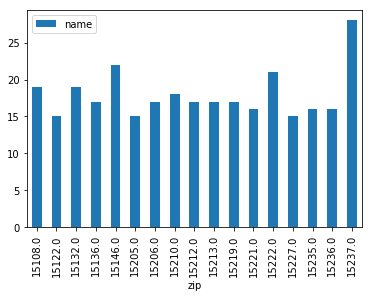

In [22]:
conveniencemarkets = pd.read_csv("data-conveniencesupermarkets.csv")
conveniencemarkets.drop(['Client ID', 'Legal Name', 'Start Date', 'Street #', 'Street Name', 'State', 'Lat', 'Lon', 'Accuracy', 'Category'], axis=1, inplace=True)
conveniencemarkets.rename(columns={'Name': 'name', 'Zip': 'zip'}, inplace = True)

ccounts = conveniencemarkets.groupby('zip').count()
ccounts_temp = ccounts.loc[ccounts['name'] > ccounts['name'].max()/2]
ccounts_temp.plot.bar()

Restaurant stuff 

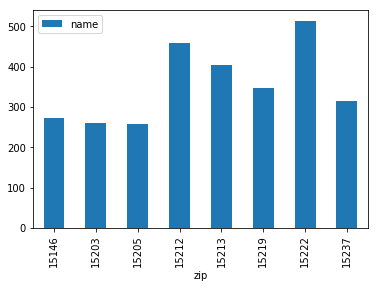

In [20]:
restaurants = pd.read_csv('GeocodedFoodFacilities.csv')
restaurants.drop_duplicates(subset = ['facility_name','num'], keep = 'first', inplace = True)

restaurants = restaurants.loc[restaurants['description'] != 'Chain Retail/Convenience Store']
restaurants = restaurants.loc[restaurants['description'] != 'Retail/Convenience Store']
restaurants = restaurants.loc[restaurants['description'] != 'Chain Packaged Food Only']
restaurants = restaurants.loc[restaurants['municipal'] != 'Out Of County']

restaurants.drop(['id', 'num', 'street', 'city', 'state', 'municipal', 'category_cd', 'description', 'fdo', 'bus_st_date', 'p_code', 'seat_count', 'noroom', 'sq_feet', 'status', 'placard_st', 'x', 'y', 'address'], axis=1, inplace=True)
restaurants.rename(columns={'facility_name': 'name'}, inplace = True)

rcounts = restaurants.groupby('zip').count()
rcounts_temp = rcounts.loc[rcounts['name'] > rcounts['name'].max()/2]
rcounts_temp.plot.bar()

Farmers Market Stuff

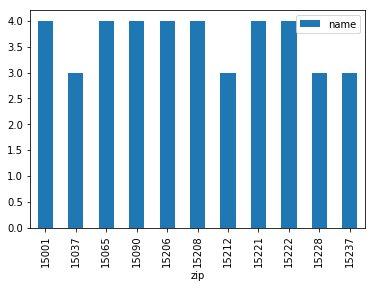

In [19]:
farmersmarkets = pd.read_csv('2019_farmers-markets.csv')
farmersmarkets.drop(['Street_Address', 'City', 'State', 'Latitude', 'Longitude', 'Additional_Directions', 'Day_Time', 'Season', 'Affiliations'], axis=1, inplace=True)
farmersmarkets.rename(columns={'Name': 'name', 'Zip': 'zip'}, inplace = True)

fcounts = farmersmarkets.groupby('zip').count()
fcounts_temp = fcounts.loc[fcounts['name'] > fcounts['name'].max()/2]
fcounts_temp.plot.bar()

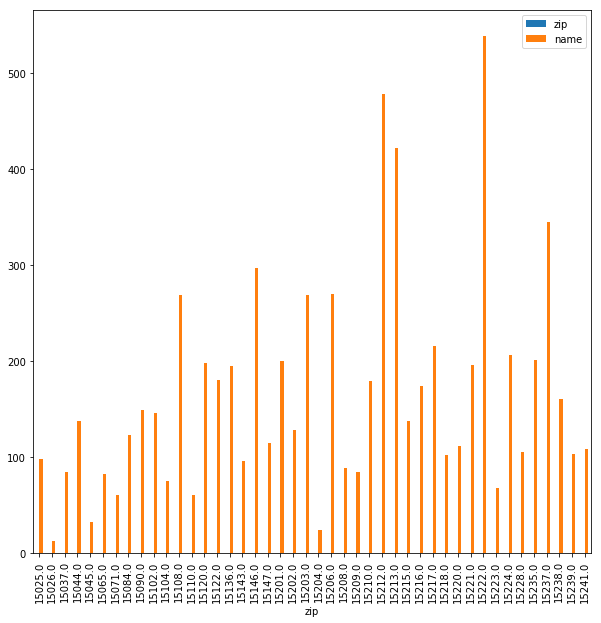

In [49]:
total_counts = pd.DataFrame({'zip': [], 'name': []})
total_counts['name'] = ccounts['name'] + rcounts['name'] + fcounts['name']
total_counts = total_counts.loc[total_counts['name'] > 0]
total_counts.plot.bar(figsize=(10,10))